In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
company_names = ['DBR', 'AMROBK', 'BACR-Bank', 'BNP', 'BYLAN', 'CMZB', 'CSGAG', 'DB',
                 'DZBK', 'ERGBA', 'HSBC', 'HSBC-HSBCBank', 'INTNED', 'LBW', 'NDB',
                 'SANPAO', 'SANTNDR', 'SEB', 'SOCGEN', 'UBS', 'UCBAG', 'BACF-BankNA',
                 'C', 'CRDSUI-USAInc', 'GS', 'JPM', 'MWD', 'RY', 'MIZUHBA', 'NOMURA']

In [3]:
df_prices = pd.read_csv('Data/cleaned_spreads.csv')
df_prices.head()

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,16-12-15,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,17-12-15,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,18-12-15,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,21-12-15,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,22-12-15,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812


In [6]:
log_ret = np.log(df_prices[company_names].shift(1)/df_prices[company_names])
log_ret = log_ret.drop(index=[0])
log_ret.head()

dates = df_prices['Date']
print(dates)

0       16-12-15
1       17-12-15
2       18-12-15
3       21-12-15
4       22-12-15
          ...   
1300    09-12-20
1301    10-12-20
1302    11-12-20
1303    14-12-20
1304    15-12-20
Name: Date, Length: 1305, dtype: object


In [8]:
for i,date in enumerate(df_prices['Date']):
    timestamp = datetime.strptime(date, '%d-%m-%y')
    df_prices['Date'][i] = timestamp
    
df_prices.head()

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,2015-12-16 00:00:00,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,2015-12-17 00:00:00,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,2015-12-18 00:00:00,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,2015-12-21 00:00:00,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,2015-12-22 00:00:00,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812


In [9]:
df_SP500 = pd.read_csv('Data/S&P 500 Historical Data.csv')
df_SP500.head()

,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,"Dec 16, 2015",2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,"Dec 17, 2015",2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,"Dec 18, 2015",2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,"Dec 21, 2015",2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,"Dec 22, 2015",2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [10]:
for i,date in enumerate(df_SP500['Date']):
    timestamp = datetime.strptime(date, '%b %d, %Y')
    df_SP500['Date'][i] = timestamp
    
df_SP500.head()

c:\users\juliu\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,2015-12-16 00:00:00,2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,2015-12-17 00:00:00,2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,2015-12-18 00:00:00,2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,2015-12-21 00:00:00,2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,2015-12-22 00:00:00,2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


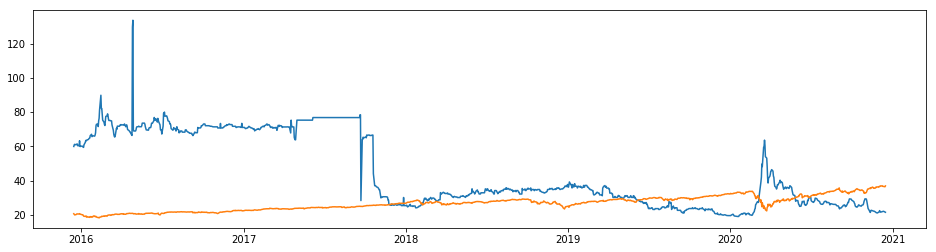

In [13]:
plt.figure(figsize=(16,4))

plt.plot(df_prices['Date'], df_prices['AMROBK'])
plt.plot(df_SP500['Date'], df_SP500['Close']/100)
plt.show()

In [14]:
df_prices = df_prices.rename(columns={'Unnamed: 0': 'Date'})
df_prices.head()

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,UCBAG,BACF-BankNA,C,CRDSUI-USAInc,GS,JPM,MWD,RY,MIZUHBA,NOMURA
0,2015-12-16 00:00:00,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,77.8846,73.2131,83.3913,82.7087,86.4448,75.6478,86.8967,60.0193,95.3847,72.3096
1,2015-12-17 00:00:00,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,77.3960,72.5302,81.0849,81.4686,84.5008,72.6121,84.9827,59.7699,92.2499,74.0992
2,2015-12-18 00:00:00,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,77.4035,72.4659,82.7367,81.4956,85.9183,73.5007,86.6896,58.2865,92.2498,75.2375
3,2015-12-21 00:00:00,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,78.8901,72.2373,83.3012,82.6190,86.1917,73.8786,86.7687,58.5826,92.5796,75.2423
4,2015-12-22 00:00:00,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,79.1427,71.9224,82.9142,82.6994,85.8843,73.1944,85.9890,58.1449,92.5795,78.2812


In [15]:
df_SP500.head()

,Unnamed: 0,Date,Close,Open,High,Low,Vol.,Change %
0,1,2015-12-16 00:00:00,2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2,2015-12-17 00:00:00,2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,3,2015-12-18 00:00:00,2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,4,2015-12-21 00:00:00,2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,5,2015-12-22 00:00:00,2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [16]:
df_merged = pd.merge_ordered(df_prices, df_SP500, on='Date').fillna(method='backfill')
df_merged.head()

,Date,DBR,AMROBK,BACR-Bank,BNP,BYLAN,CMZB,CSGAG,DB,DZBK,...,RY,MIZUHBA,NOMURA,Unnamed: 0,Close,Open,High,Low,Vol.,Change %
0,2015-12-16,8.0987,59.9553,59.5979,70.2880,78.1634,89.5873,85.6969,94.0470,79.8399,...,60.0193,95.3847,72.3096,1.0,2073.07,"2,046.50","2,076.72","2,042.43",-,1.45%
1,2015-12-17,8.1809,60.8999,58.2724,69.8070,78.8935,85.9924,84.5083,92.9731,79.8490,...,59.7699,92.2499,74.0992,2.0,2041.89,"2,073.76","2,076.37","2,041.66",-,-1.50%
2,2015-12-18,8.1656,61.2130,60.6409,71.5936,78.6469,90.5804,86.2609,94.5435,79.8527,...,58.2865,92.2498,75.2375,3.0,2005.55,"2,040.81","2,040.81","2,005.33",-,-1.78%
3,2015-12-21,8.1647,60.8928,61.2405,72.2154,78.7569,90.6353,87.5892,96.1573,79.9221,...,58.5826,92.5796,75.2423,4.0,2021.15,"2,010.27","2,022.90","2,005.93",-,0.78%
4,2015-12-22,8.1754,61.2091,60.5956,72.2073,79.0299,90.3317,87.7539,96.3618,79.8496,...,58.1449,92.5795,78.2812,5.0,2038.97,"2,023.15","2,042.74","2,020.49",-,0.88%


In [17]:
df_merged.to_csv('test.csv')

In [18]:
df_merged = df_merged.rename(columns={'Unnamed: 2': 'Close'})

In [19]:
logret_SP500 = np.log(df_merged['Close']/df_merged['Close'].shift(-1))
logret_spreads = np.log(df_merged.loc[:, df_merged.columns.isin(company_names)]/df_merged.loc[:, df_merged.columns != 'Date'].shift(-1))

In [20]:
logret_SP500.head()
# logret_SP500.shape

0    0.015155
1    0.017958
2   -0.007748
3   -0.008778
4   -0.012342
Name: Close, dtype: float64

In [21]:
logret_spreads.head()
# logret_spreads.shape

,AMROBK,BACF-BankNA,BACR-Bank,BNP,BYLAN,C,CMZB,CRDSUI-USAInc,CSGAG,Change %,...,Open,RY,SANPAO,SANTNDR,SEB,SOCGEN,UBS,UCBAG,Unnamed: 0,Vol.
0,-0.015632,0.009371,0.022492,0.006867,-0.009297,0.028047,0.040955,0.015107,0.013967,NaN,...,NaN,0.004164,0.027429,0.009892,0.001046,0.030953,0.017048,0.006293,NaN,NaN
1,-0.005128,0.000887,-0.039841,-0.025271,0.003131,-0.020167,-0.051979,-0.000331,-0.020527,NaN,...,NaN,0.025132,-0.027816,-0.032919,0.000961,-0.040500,-0.056466,-0.000097,NaN,NaN
2,0.005245,0.003160,-0.009839,-0.008648,-0.001398,-0.006800,-0.000606,-0.013691,-0.015281,NaN,...,NaN,-0.005067,-0.020784,-0.052289,-0.003912,-0.015721,-0.002460,-0.019024,NaN,NaN
3,-0.005181,0.004369,0.010586,0.000112,-0.003460,0.004657,0.003355,-0.000973,-0.001879,NaN,...,NaN,0.007500,0.017144,0.009172,0.008748,0.004756,-0.003680,-0.003197,NaN,NaN
4,-0.002615,0.000122,0.011943,0.006894,-0.001645,0.012040,0.014753,0.000145,0.019063,NaN,...,NaN,0.000141,0.001836,-0.004679,-0.010771,0.005826,0.024343,0.003321,NaN,NaN


In [78]:
lookback = 800

detrended = {}

for company_name in company_names:  
#     print(company_name)
    X = np.column_stack((logret_SP500[:-2], logret_spreads[company_name].shift(-1)[:-2]))
#     X = np.column_stack((logret_SP500[:-4], logret_SP500.shift(-1)[:-4], logret_SP500.shift(-2)[:-4], 
#                          logret_SP500.shift(-3)[:-4]))
    X = logret_SP500[:-2]
    X = logret_SP500[:-lookback]
    X = sm.add_constant(X)
    mod = sm.OLS(logret_spreads[company_name][:-lookback], X)
    res = mod.fit()
    print(res.summary())
    coeff = res.params[1]
    
    print(coeff)
    
    detrend = logret_spreads[company_name] - coeff*logret_SP500
    detrended[company_name] = detrend
    
# df_detrended = pd.DataFrame(detrended)
# df_detrended.to_csv('cleaned_spreads_detrended.csv')

                            OLS Regression Results                            
Dep. Variable:                    DBR   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     6.886
Date:                Wed, 28 Apr 2021   Prob (F-statistic):            0.00895
Time:                        19:37:26   Log-Likelihood:                 650.21
No. Observations:                 505   AIC:                            -1296.
Df Residuals:                     503   BIC:                            -1288.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.003     -0.039      0.9

                            OLS Regression Results                            
Dep. Variable:                    LBW   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.563
Date:                Wed, 28 Apr 2021   Prob (F-statistic):             0.0332
Time:                        19:37:26   Log-Likelihood:                 1041.8
No. Observations:                 505   AIC:                            -2080.
Df Residuals:                     503   BIC:                            -2071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      0.575      0.5

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
-1.3306148791337393
                            OLS Regression Results                            
Dep. Variable:                     RY   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     6.137
Date:                Wed, 28 Apr 2021   Prob (F-statistic):             0.0136
Time:                        19:37:27   Log-Likelihood:                 843.96
No. Observations:                 505   AIC:                            -1684.
Df Residuals:                     503   BIC:                            -1675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

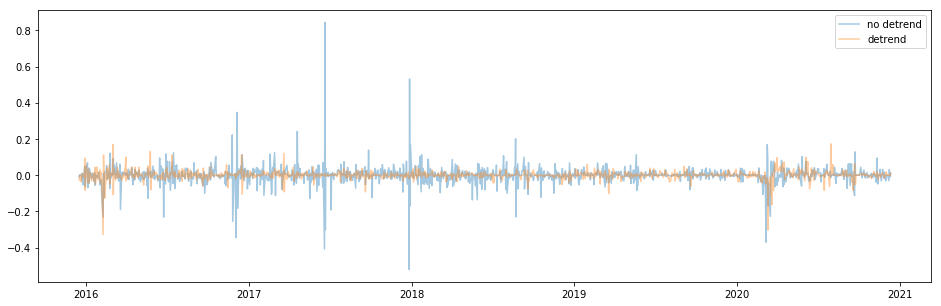

In [79]:
plot_lookback = 2

fig = plt.figure(figsize=(16,5))
# plt.plot(df_prices['Date'][:-lookback], logret_SP500[:-lookback])
# plt.plot(df_prices['Date'][:-lookback], logret_spreads['DBR'][:-lookback]-detrended['DBR'][:-lookback])
plt.plot(df_prices['Date'][:-plot_lookback], logret_spreads['DBR'][:-plot_lookback], alpha=0.4, label='no detrend')
plt.plot(df_prices['Date'][:-plot_lookback], detrended[company_name][:-plot_lookback], alpha=0.4, label='detrend')
plt.legend()
plt.show()